<a href="https://colab.research.google.com/github/jam411/dataanalysis/blob/main/gaussian_approximation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Date: 5/24/2021  
Name: Ryoji SHIMIZU
# Gaussian Approximation (product two gaussians, product infinite gaussian mixture and single gaussian, the single gaussian moment-mathing approximation)

A Gaussian distribution with mean $m$ and variance $v$ is :
$$
    N(m,v) = \frac{1}{\sqrt{2\pi v}}e^{-\frac{(z-m)^2}{2v}}. \quad \tag{1}
$$

###1. Given two Gaussians $N(m_1,v_1)$ and $N(m_2,v_2)$, what is their product $N(m_1,v_1) \cdot N(m_2,v_2)$.



Let $m_1 = 4, v_1 = 9$ and $m_2 = -3, v_2 = 4$.   
Compair Product result and Equation result.   

Equation result, [1]   
Mean:
$$
    m = \frac{\frac{m_1}{v_1} + \frac{m_2}{v_2}}{\frac{1}{v_1} + \frac{1}{v_2}}. \tag{2}
$$
Variace:
$$
    v = \frac{1}{\frac{1}{v_1} + \frac{1}{v_2}}. \tag{3}
$$



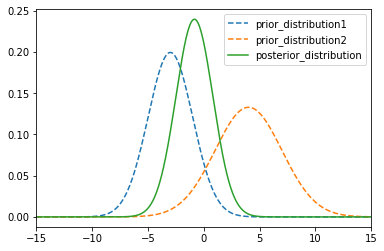

Mean value from calc
-0.8461538461538463
Variance from calc
2.769230769230769
Mean value from graph
-0.8461584615846167
Variance from graph
2.7722249999999993


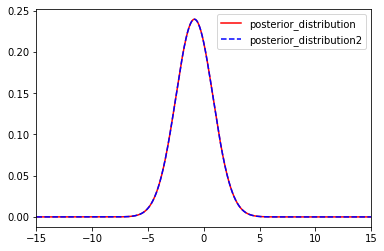

In [78]:
import math
from operator import pos
import numpy as np
import matplotlib.pyplot as plt
 
### Gaussian distribution function
# v = sigma**2
def gaussian(mean, variance, x):
    return np.exp(-(x-mean)**2/(2*variance)) / (math.sqrt(2*math.pi*variance))
 
### Parameters
# Parameter of Gaussian distribution1: N(m1,v1)
m1 = -3
v1 = 4
 
# Parameter of Gaussian distribution2: N(m2,v2)
m2 = 4
v2 = 9
 
# Width of x-axis
step = 100000
x_lim = 15.0
n = np.linspace(-x_lim, x_lim, step)
 
# Width of per one memory
interval = x_lim*2 / step
 
###
# make gaussian distribution
prior_distribution1 = gaussian(m1,v1,n)
prior_distribution2 = gaussian(m2,v2,n)
posterior_distribution = prior_distribution1 * prior_distribution2

# normalization constant (Find the const to make the area 1), 1.0/area
normalization = 1.0 / (np.array(posterior_distribution).sum() * interval)
# normalization
posterior_distribution = np.array(posterior_distribution) * normalization
 
### plot
#plt.plot(n, test, label="test")
plt.plot(n, prior_distribution1, '--', label="prior_distribution1")
plt.plot(n, prior_distribution2, '--', label="prior_distribution2")
plt.plot(n, posterior_distribution, label="posterior_distribution")
plt.xlim([-x_lim, x_lim])
plt.legend()
plt.show()

########################

# mean
m3 = ((m2/v2) + (m1/v1)) / ((1/v2) + (1/v1))
# variance
v3 = 1.0 / ( (1.0/v1) + (1.0/v2) )


print("Mean value from calc")
print(m3)
print("Variance from calc")
print(v3)


#########################

# mean
print("Mean value from graph")
print(n[np.argmax(posterior_distribution)])
# variance
area_sum = 0
for i in range(int(step/2)):
  area_sum += posterior_distribution[np.argmax(posterior_distribution)+i] * interval
  if area_sum >= 0.3415: # 68.3%
    print("Variance from graph")
    print((i*interval)**2)
    break

#########################
# make gaussian distribution
posterior_distribution2 = gaussian(m3, v3, n)

# represent to graph
plt.plot(n, posterior_distribution, label="posterior_distribution", color='r')
plt.plot(n, posterior_distribution2, '--', label="posterior_distribution2", color='b')
plt.xlim([-x_lim, x_lim])
plt.legend()
plt.show()

###2. An infinite Gaussian mixture is　$$
    M = \sum_{i=-\infty}^{\infty}N(m_1 + \frac{i}{h},v_1), \tag{4}
$$　where $h$ is some constant. What is the product $M \cdot N(m_2,v_2)$ ?

This siulation sampling $i = -20$ ~ $20$, $h = 0.08$.
Product $M \cdot N(m_2,v_2)$.

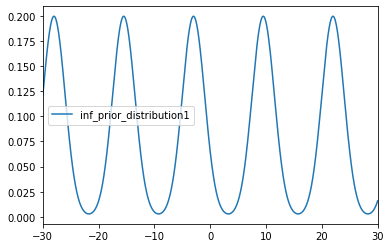

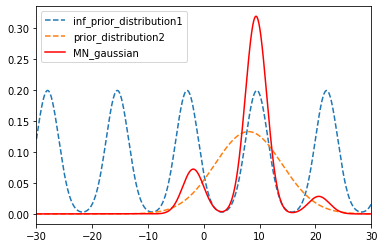

In [83]:
#########################
# parametar
frm = -20
to = 20
h = 0.08

# plot range
x_lim = 30.0
n = np.linspace(-x_lim, x_lim, step)

#########################

# Infinite Gaussian Mixture Function
def inf_gaussian(frm, to, h, mean, variance, x):
    result = 0
    for i in range(frm, to+1, 1):
        result += np.exp(-(x-mean+(i/h))**2/(2*variance)) / (math.sqrt(2*math.pi*variance))
    return result
 
inf_prior_distribution1 = inf_gaussian(frm,to,h,m1,v1,n)

# plot
plt.plot(n, inf_prior_distribution1, label="inf_prior_distribution1")
plt.xlim([-x_lim, x_lim])
plt.legend()
plt.show()

#########################
##Product $M \cdot N(m_2,v_2)$.
#########################
MN_gaussian = inf_prior_distribution1 * prior_distribution2

# normalization constant (Find the const to make the area 1), 1.0/area
normalization = 1.0 / (np.array(MN_gaussian).sum() * interval)
# normalization
MN_gaussian = np.array(MN_gaussian) * normalization

# plot
plt.plot(n, inf_prior_distribution1,'--',label="inf_prior_distribution1")
plt.plot(n, prior_distribution2,'--',label="prior_distribution2")
plt.plot(n, MN_gaussian, label="MN_gaussian", color="r")
plt.xlim([-x_lim, x_lim])
plt.legend()
plt.show()

###3. Given a finite mixture of $M$ Gaussians where Gaussian $i$ has mean $m_i$ and variance $v_i$ $$ 
    GM = \sum_{i=1}^{M}c_iN(m_i,v_i), \tag{5} 
$$ and the $c_i > 0$ are mixing coefficients, what is the single gaussian $MM(m,v)$ that is the moment-matching approximation of $GM$ ?

The moment-matching approximation finds the single Gaussian $N(m,v)$ which has the same mean $m$ and variance $v$ as $GM$ based on the minimization of KL divergence [1] [2].   
This operation is denoted as [1]:
$$
    N(m,v) = MM(GM). \tag{6}
$$   
The mean $m$ and variance $v$ is given by:
$$
    m = \sum_{i=1}^{M}c_im_i, \tag{7}
$$
$$
    v = \sum_{i=1}^{M}c_im_i^2 - (\sum_{i=1}^{M}c_im_i)^2. \tag{8}
$$   
The mixing coefficients $c_i > 0$ and $\sum_{i=1}^{M}c_i=1$ for $i=1,2,...,M$.   

In this report, approximating a mixture of "two Gaussians" followed by [2]. 

When approximating a true distribution $p(z)$, by an approximate distribution $q(z)$, a reasonable approcah is to choose $q(z)$ in such a way that the $KL(p||q)$ is minimized. When $q(z)$ is a Gaussian, selecting the mean and variance to be the same as those of $p(z)$ will minimaize the divergence. [2]

(But, we don't need consider KL-divergence in this "two Gaussians" case)

*Lemma 1:* The singl Gaussian with mean $m$ and variance $v$ which minimizes the divergence from the mixture of two Gaussians $c_1N(m_1,v_1)+c_2N(m_2,v_2)$ is given by: (NOTE:equation (11) differ from (8))   

$$
    m = c_1m_1 + c_2m_2, \tag{10}
$$

$$
    v = c_1(m_1^2+v_1)+c_2(m_2^2+v_2) \\ - c_1^2m_1^2 - 2c_1c_2m_1m_2 - c_2^2m_2^2, \tag{11}
$$

$$
    c_1 + c_2 = 1 \tag{12}.
$$

When M=2 [1], equation (2) (3) given by :
$$
    c = \frac{c_1 c_2}{\sqrt{2\pi(v_1+v_2)}}e^{-\frac{(m_1-m_2)^2}{2(v_1+v_2)}}. \tag{9}
$$

Let mixture coefficients $c_1 = 0.5$ and $c_2 = 0.5$.

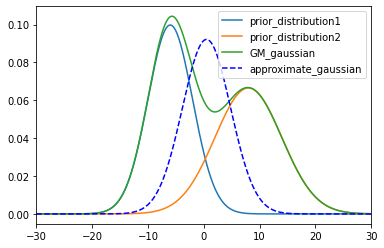

In [96]:
#########################
# mixture coefficients , normalization parameter
c1 = 0.5
c2 = 0.5

m = c1*m1 + c2*m2
v = c1*(m1**2 + v1) + c2*(m2**2 + v2) - (c1*m1 + c2*m2)**2

#########################
# generate GM_gaussian (mixture of two GAussians)
GM_gaussian = (prior_distribution1*c1) + (prior_distribution2*c2)

# generate approximate gaussian distribution
approximate_gaussian = gaussian(m, v, n)

#########################
# represent to graph
plt.plot(n, prior_distribution1*c1, label="prior_distribution1")
plt.plot(n, prior_distribution2*c2, label="prior_distribution2")
plt.plot(n, GM_gaussian, label="GM_gaussian")
plt.plot(n, approximate_gaussian, '--', label="approximate_gaussian", color='b')
plt.xlim([-x_lim, x_lim])
plt.legend()
plt.show()

In this report, approximating a mixture of "two Gaussians" followed by [2]. 

When approximating a true distribution $p(z)$, by an approximate distribution $q(z)$, a reasonable approcah is to choose $q(z)$ in such a way that the $KL(p||q)$ is minimized. When $q(z)$ is a Gaussian, selecting the mean and variance to be the same as those of $p(z)$ will minimaize the divergence. [2]

*Lemma 1:* The singl Gaussian with mean $m$ and variance $v$ which minimizes the divergence from the mixture of two Gaussians $c_1N(m_1,v_1)+c_2(m_2,v_2)$ is given by: (NOTE:equation (11) differ from (8))   

$$
    m = c_1m_1 + c_2m_2, \tag{10}
$$

$$
    v = c_1(m_1^2+v_1)+c_2(m_2^2+v_2) \\ - c_1^2m_1^2 - 2c_1c_2m_1m_2 - c_2^2m_2^2 \tag{11}
$$

$$
    c_1 + c_2 = 1 \tag{12}
$$

Computing the divergence numerically is complex. Instead, we compute a "lower bound" on the divergence, the squared difference, which might also be referred to as the "norm2, $L_2$" distance.

*Definition* The squared difference $SD(p||q)$ with support $Z$ is defined as:

$$
    SD(p||q) = \int_{z \in Z}(p(z)-q(z))^2dz \tag{13}
$$

The squared difference is non-negative and zero iff $p=q$. (symmetric)

For discrete distributions, the squared difference forms a lower bound on the divergence. The "norm1, $L_1$" is $\sum_{a \in A}|p(a)-q(a)|$. The divergence is lower bounded by:

$$
    KL(p||q) \geq \frac{1}{2 \ln 2}(\sum_{a \in A}|p(a)-q(a)|)^2. \tag{14}
$$

(cross terms are all non-negative). Thus, the $L_1$ distance is lower bounded by the squared distance and we have proved the following.

*Lemma 2:* any two discrete distributions $p$ and $q$:

$$
    KL(p||q) \geq \frac{1}{2 \ln 2} SD(p||q). \tag{15}
$$

Note taht computing the $L_1$ distance requires evaluation of error functions, and is not considered for complexity reasons. It will be convenient to have a function which describes the penalty of replacing two Gaussians with a single Gaussian. Define the *Gaussian quadratic loss* $GOL(p)$ as the squared difference between a distribution $p$ and the Gaussian distibution with the same mean $m$ and variance $v$ as $p$:

$$
    GQL(p) = SD(p||N(m,v)). \tag{16}
$$

*Lemma 3:* For the distribution which is the mixture of two Gaussians $t_1 = (m_1,v_1,c_1)$ and $t_2 = (m_2,v_2,c_2)$ with $c_1 + c_2 = 1$, the Gaussian quadratic loss is given by:

$$
    GQL(t_1,t_2) = \frac{1}{2\sqrt{\pi v}} + \frac{c_1^2}{2\sqrt{\pi v_1}} + \frac{c_2^2}{2\sqrt{\pi v_2}} \\ - \frac{2c_1}{\sqrt{2\pi (v+v_1)}}e^{-\frac{(m-m_1)^2}{2(v+v_1)}} - \frac{2c_2}{\sqrt{2 \pi (v+v_2)}}e^{-\frac{(m-m_2)^2}{2(v+v_2)}} + \frac{2 c_1 c_2}{\sqrt{2\pi (v_1+v_2)}}e^{-\frac{(m_1-m_2)^2}{2(v_1+v_2)}}, \tag{17}
$$

where $m$ and $v$ are given in (10) and (11), respectively.

Even when the mixture is not normalized, the GQL is computed by first normalizing the mixing coefficients. In particular, let $\overline{t}_1 = (m_1,v_1,\overline{c}_1)$ and $\overline{t}_2 = (m_2,v_2,\overline{c}_2)$ with $\overline{c}_1 + \overline{c}_2 \neq 1$. Then $c_i = \overline{c}_i / (\overline{c}_1+\overline{c}_2),i=1,2,$ and $GQL(\overline{t}_1,\overline{t}_2)$ is defined to be equal to $GQL(t_1,t_2)$ is found using Lemma3. 


similer (9). $c_1*c_2 = 1?$.

$$
    constant = \frac{1}{\sqrt{2\pi (v_1+v_2)}}e^{-\frac{(m_2-m_1)}{2\sqrt{v_1+v_2}}} . \tag{tmp}
$$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
/usr

constant: 0.016805843989370465
prodN(-0.8461538461538463,2.769230769230769)
sum prod/c: 1.0000000000000002


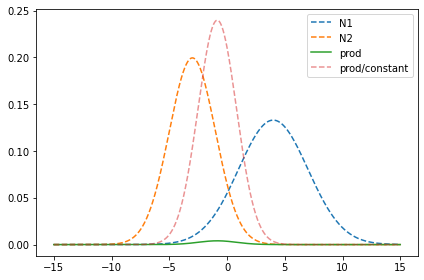

In [ ]:
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt

%matplotlib inline

n = sp.linspace(-x_lim, x_lim, step)
mu1, s21 = (m1, v1) # mean and variance
mu2, s22 = (m2, v2)

# Norm
N1 = stats.norm(loc=mu1, scale=sp.sqrt(s21))
N2 = stats.norm(loc=mu2, scale=sp.sqrt(s22))
prod = N1.pdf(n) * N2.pdf(n) # scipy generate gaussian
c = stats.norm(loc=mu1, scale=sp.sqrt(s21+s22)).pdf(mu2) #### constant
print("constant:", c)

#inf_gaussian_distribution2 = inf_gaussian(frm,to,c,m1,v1,n) # test

# calc
prod_s2 = 1 / ( 1/s21 + 1/s22) # variance calc
prod_m = prod_s2 * (mu1 / s21 + mu2 / s22) # mean calc
print(f"prodN({prod_m},{prod_s2})")

prodN = stats.norm(loc=prod_m, scale=sp.sqrt(prod_s2))
#plt.plot(n, MN_gaussian/c, label="MN_gaussian", color="r")
#plt.plot(n, inf_gaussian_distribution2,'--',label="inf_gaussian_distribution2")
plt.plot(n, N1.pdf(n), linestyle="--", label="N1")
plt.plot(n, N2.pdf(n), linestyle="--", label="N2")
plt.plot(n, prod, label="prod")
s = prod/c
plt.plot(n, s, label="prod/constant", linestyle="--", alpha=0.5)
print("sum prod/c:", sp.sum((s[:-1] + s[1:]) * sp.diff(n)/2))
#plt.plot(n, prodN.pdf(n), label=f"prodN({prod_m: .2f}, {prod_s2: .2f})", alpha=0.5)

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
t1 = (m1,v1,c1)
t2 = (m2,v2,c2)



m = c1*m1 + c2*m2
v = c1*(m1**2 + v1) + c2*(m2**2 + v2) - (c1*m1 + c2*m2)**2

def gaussian_quadratic_loss(t1, t2):
    tmp1 = 1 / 2*math.sqrt(math.pi*v)
    tmp2 = c1**2 / 2*math.sqrt(math.pi*v1)
    tmp3 = c2**2 / 2*math.sqrt(math.pi+v2)
    tmp4 = (2*c1 / math.sqrt(2*math.pi*(v+v1))) * np.exp(-(m-m1)**2 / (2*(v+v1)))
    tmp5 = (2*c2 / math.sqrt(2*math.pi*(v+v2))) * np.exp(-(m-m2)**2 / (2*(v+v2)))
    tmp6 = (2*c1*c2 / math.sqrt(2*math.pi*(v1+v2))) * np.exp(-(m1-m2)**2 / (2*(v1+v2)))
    return tmp1 + tmp2 + tmp3 - tmp4 - tmp5 + tmp6




def _outer(x, y):
    """
    Computes the outer production between 1d-ndarrays x and y.
    """
    m = x.shape[0]
    n = y.shape[0]
    res = np.empty((m, n), dtype=np.float64)
    for i in range(m):
        for j in range(n):
            res[i, j] = x[i]*y[j]
    return res

def merge(w1, mu1, cov1, w2, mu2, cov2):
    w_m = w1+w2
    mu_m = (w1/w_m)*mu1 + (w2/w_m)*mu2
    cov_m = (w1/w_m)*cov1 + (w2/w_m)*cov2 + (w1*w2/w_m**2)*_outer(mu1-mu2, mu1-mu2)
    return (w_m, mu_m, cov_m)

def KL_divergence(w1, mu1, cov1, w2, mu2, cov2):
    w_m, mu_m, cov_m = merge(w1, mu1, cov1, w2, mu2, cov2)
    return 0.5*((w1+w2)*np.log(det(cov_m)) - w1*np.log(det(cov1)) - w2*np.log(det(cov2)))



m = 
v = [9,4]

M = 0
for i in range(len(m)):
    M += 1

c1= 1
c2= 59.50311097928139
# sum_c = 1
mixing_coefficient = (c1*c2) * np.exp(-((m1-m2)**2)/(2*(v1+v2))) / math.sqrt(2*math.pi*(v1+v2))
print(mixing_coefficient)
"""
def MM_mean(M):
    result = 0
    for i in range(M):
        result += mixing_coefficient[i] * m[i]
    return result

def MM_variance(M):
    tmp1 = 0
    tmp2 = 0
    for i in range(M):
        tmp1 += mixing_coefficient[i] * (m[i]**2)
        tmp2 += mixing_coefficient[i] * m[i]
    return tmp1 - tmp2**2 

def finite_gaussian(M):
    return 

# mixing coefficients
"""

1.0000000000000002


'\ndef MM_mean(M):\n    result = 0\n    for i in range(M):\n        result += mixing_coefficient[i] * m[i]\n    return result\n\ndef MM_variance(M):\n    tmp1 = 0\n    tmp2 = 0\n    for i in range(M):\n        tmp1 += mixing_coefficient[i] * (m[i]**2)\n        tmp2 += mixing_coefficient[i] * m[i]\n    return tmp1 - tmp2**2 \n\ndef finite_gaussian(M):\n    return \n\n# mixing coefficients\n'

In [ ]:
"""
M = 2
coefficients = []
meams = []
variances = []

# Finite Gaussian Mixture Function
def finite_gaussian(M, coefficients, means, variances, x):
    result = 0
    for i in range(M+1):
        result += np.exp(-(x-mean+(i/h))**2/(2*variance)) / (math.sqrt(2*math.pi*variance))
    return result
"""

In [ ]:
import numpy as np
from numpy.linalg import det
import numba
from numba import prange
from sklearn.neighbors import NearestNeighbors

ii32 = np.iinfo(np.int32)
MAXINT = ii32.max

################################################################
# HELPER FUNCTIONS
################################################################

@numba.jit('float64[:,:] (float64[:], float64[:])', nopython=True)
def _outer(x, y):
    """
    Computes the outer production between 1d-ndarrays x and y.
    """
    m = x.shape[0]
    n = y.shape[0]
    res = np.empty((m, n), dtype=np.float64)
    for i in range(m):
        for j in range(n):
            res[i, j] = x[i]*y[j]
    return res


@numba.jit('float64 (float64[:], float64[:], float64[:,:])', nopython=True)
def normal(x, mu, cov):
    """
    Normal distribution with parameters mu (mean) and cov (covariance matrix)
    """
    d = mu.shape[0]
    return (1./np.sqrt((2.*np.pi)**d * det(cov))) * np.exp(-0.5*np.dot(x-mu, np.dot(np.linalg.inv(cov), x-mu)))


def normalize(w, mu, cov):
    pass



def ncomp_finder(kl_hist, w_size=10):
    """
    Heuristic: If the actual diff is 1 order of magnitude
    greater than the mean of the 10 last diff values, we 
    consider this points as the estimate of the number of components
    """
    diff = np.diff(kl_hist)
    diff -= diff.min()
    diff /= diff.max()
    reached_flag = False
    
    for i in range(w_size, len(diff)):
        # If actual diff is 1 order of magnitude
        if diff[i] > 10*np.mean(diff[i-w_size:i]):
            reached_flag = True
            break
    if not reached_flag:
        # in case of no high increase is detected
        i += 1
    return len(kl_hist)-i



@numba.jit('Tuple((float64, float64[:], float64[:,:])) (float64, float64[:], \
            float64[:,:], float64, float64[:], float64[:,:])', nopython=True)
def merge(w1, mu1, cov1, w2, mu2, cov2):
    """
    Computes the moment preserving merge of components (w1,mu1,cov1) and
    (w2,mu2,cov2)
    """
    w_m = w1+w2
    mu_m = (w1/w_m)*mu1 + (w2/w_m)*mu2
    cov_m = (w1/w_m)*cov1 + (w2/w_m)*cov2 + (w1*w2/w_m**2)*_outer(mu1-mu2, mu1-mu2)
    return (w_m, mu_m, cov_m)



@numba.jit('Tuple((float64, float64[:], float64[:,:])) (float64, float64[:], \
            float64[:,:], float64, float64[:], float64[:,:])', nopython=True)
def isomorphic_merge(w1, mu1, cov1, w2, mu2, cov2):
    """
    Computes the isomorphic moment preserving merge of components (w1,mu1,cov1) and
    (w2,mu2,cov2)
    """
    d = len(mu1)
    w_m = w1+w2
    mu_m = (w1/w_m)*mu1 + (w2/w_m)*mu2
    cov_m = (w1/w_m)*cov1 + (w2/w_m)*cov2 + (w1*w2/w_m**2) * np.abs(det(_outer(mu1-mu2, mu1-mu2)))**(1./d) * np.identity(d)
    return (w_m, mu_m, cov_m)



@numba.jit('float64 (float64, float64[:], float64[:,:], float64, float64[:], float64[:,:])', nopython=True)
def kl_diss(w1, mu1, cov1, w2, mu2, cov2):
    """
    Computation of the KL-divergence (dissimilarity) upper bound between components 
    [(w1,mu1,cov1), (w2,mu2,cov2)]) and its moment preserving merge, as proposed in 
    ref: A Kullback-Leibler Approach to Gaussian Mixture Reduction
    """
    w_m, mu_m, cov_m = merge(w1, mu1, cov1, w2, mu2, cov2)
    return 0.5*((w1+w2)*np.log(det(cov_m)) - w1*np.log(det(cov1)) - w2*np.log(det(cov2)))



@numba.jit('float64 (float64, float64[:], float64[:,:], float64, float64[:], float64[:,:])', nopython=True)
def isd_diss(w1, mu1, cov1, w2, mu2, cov2):
    """
    Computes the ISD (Integral Square Difference between components [(w1,mu1,cov1), (w2,mu2,cov2)])
    and its moment preserving merge. Ref: Cost-Function-Based Gaussian Mixture Reduction for Target Tracking
    """
    w_m, mu_m, cov_m = merge(w1, mu1, cov1, w2, mu2, cov2)
    # ISD analytical computation between merged component and the pair of gaussians
    Jhr = w1*w_m * normal(mu1, mu_m, cov1+cov_m) + w2*w_m * normal(mu2, mu_m, cov2+cov_m)
    Jrr = w_m**2 * (1./np.sqrt((2*np.pi)**2 * det(2*cov_m)))
    Jhh = (w1**2)*(1./np.sqrt((2*np.pi)**2 * det(2*cov1))) + \
          (w2**2)*(1./np.sqrt((2*np.pi)**2 * det(2*cov2))) + \
          2*w1*w2*normal(mu1, mu2, cov1+cov2)
    return Jhh - 2*Jhr + Jrr



def compute_neighbors(mu_center, maxsig):
    nn = NearestNeighbors(radius=maxsig, algorithm="ball_tree", n_jobs=-1)
    nn.fit(mu_center)
    neigh_indexes_arr = nn.radius_neighbors(mu_center, return_distance=False)
    
    # creating the initial array
    maxlen = 0
    for arr in neigh_indexes_arr:
        if len(arr)>maxlen:
            maxlen = len(arr)
    neigh_indexes = MAXINT*np.ones((len(neigh_indexes_arr),maxlen-1), dtype=np.int32)
    
    # filling it with the correct indexes
    for i,arr in enumerate(neigh_indexes_arr):
        ll = arr.tolist(); ll.remove(i); ll.sort()
        for j,index in enumerate(ll):
            neigh_indexes[i,j] = index      
    return nn,neigh_indexes



@numba.jit(nopython=True)
def build_diss_matrix(w, mu, cov, nn_indexes):
    M,max_neigh = nn_indexes.shape
    diss_matrix = -1.*np.ones((M,max_neigh))
    for i in range(M):
        for j in range(max_neigh):
            jj = nn_indexes[i,j]
            if jj==MAXINT: break
            diss_matrix[i,j] = kl_diss(w[i],mu[i],cov[i],w[jj],mu[jj],cov[jj])  
    return diss_matrix



@numba.jit(nopython=True)
def least_dissimilar(diss_matrix, indexes, nn_indexes):
    max_neigh = diss_matrix.shape[1]
    i_min = -1; j_min = -1
    diss_min = np.inf
    for i in indexes:
        for j in range(max_neigh):
            if diss_matrix[i,j]==-1: break
            if diss_matrix[i,j]<diss_min:
                diss_min = diss_matrix[i,j]
                i_min = i
                j_min = nn_indexes[i,j]
    return i_min,j_min


@numba.jit(nopython=True)
def get_index(array, value):
    n = len(array)
    for i in range(n):
        if array[i]==value: return i
    return -1


@numba.jit(nopython=True)
def update_merge_mapping(merge_mapping, nindex, dindex):
    n = len(merge_mapping)
    for i in range(n):
        if merge_mapping[i]==dindex:
            merge_mapping[i] = nindex



def radius_search(nn, mu, max_neigh, merge_mapping, nindex, dindex):
    neigh_arr = nn.radius_neighbors([mu], return_distance=False)[0]
    for i in range(len(neigh_arr)):
        ii = merge_mapping[neigh_arr[i]]
        # avoiding neighbor of itself
        if ii==nindex or ii==dindex:
            neigh_arr[i] = MAXINT
            continue
        neigh_arr[i] = ii
    neigh_arr = np.unique(neigh_arr)
    if len(neigh_arr)>max_neigh:
        neigh_arr = nn.kneighbors([mu], n_neighbors=max_neigh, return_distance=False)[0]
        for i in range(len(neigh_arr)):
            ii = merge_mapping[neigh_arr[i]]
            # avoiding neighbor of itself
            if ii==nindex or ii==dindex:
                neigh_arr[i] = MAXINT
                continue
            neigh_arr[i] = ii
        neigh_arr = np.unique(neigh_arr)
    ret = MAXINT*np.ones(max_neigh, dtype=np.int32)
    ret[0:len(neigh_arr)] = neigh_arr
    return ret



@numba.jit(nopython=True)
def update_structs(nn_indexes, diss_matrix, w, mu, cov, indexes, nindex, dindex):
    """
    Updates the nn_indexes and diss_matrix structs by removing the items
    corresponding to dindex and updating the ones corresponding to nindex
    """
    max_neigh = nn_indexes.shape[1]
    for i in indexes:
        if i==nindex: continue # this is an special case (see below)
        flag1 = False
        flag2 = False
        for j in range(max_neigh):
            jj = nn_indexes[i,j]
            if jj==MAXINT: break
            if jj==nindex: 
                diss_matrix[i,j] = kl_diss(w[i],mu[i],cov[i],w[jj],mu[jj],cov[jj])
                flag1 = True
            elif jj==dindex and flag1:
                nn_indexes[i,j] = MAXINT
                diss_matrix[i,j] = -1
                flag2 = True
            elif jj==dindex and not flag1:
                nn_indexes[i,j] = nindex
                diss_matrix[i,j] = kl_diss(w[i],mu[i],cov[i],w[jj],mu[jj],cov[jj])
                flag2 = True
        if flag2:
            sorted_indexes = np.argsort(nn_indexes[i,:])
            nn_indexes[i,:] = (nn_indexes[i,:])[sorted_indexes]
            diss_matrix[i,:] = (diss_matrix[i,:])[sorted_indexes]

    # the special case...
    for j in range(max_neigh):
        jj = nn_indexes[nindex,j]
        if jj!=MAXINT:
            diss_matrix[nindex,j] = kl_diss(w[nindex],mu[nindex],cov[nindex],w[jj],mu[jj],cov[jj])
        else:
            diss_matrix[nindex,j] = -1


################################################################
# MAIN FUNCTION
################################################################

def mixture_reduction(w, mu, cov, n_comp, isomorphic=False, verbose=True, optimization=True):
    """
    Gaussian Mixture Reduction Through KL-upper bound approach
    """

    # original size of the mixture
    M = len(w) 
    # target size of the mixture
    N = n_comp
    # dimensionality of data
    d = mu.shape[1]

    # we consider neighbors at a radius equivalent to the lenght of 5 pixels
    if cov.ndim==1:
        maxsig = 5*np.max(cov)
        # if cov is 1-dimensional we convert it to its covariance matrix form
        cov = np.asarray( [(val**2)*np.identity(d) for val in cov] )
    else:
        maxsig = 5*max([np.max(np.linalg.eig(_cov)[0])**(1./2) for _cov in cov])

    indexes = np.arange(M, dtype=np.int32)
    nn,nn_indexes = compute_neighbors(mu, maxsig)

    # idea: keep track that the k-th component was merged into the l-th positon
    merge_mapping = np.arange(M, dtype=np.int32)

    # max number of neighbors
    max_neigh = nn_indexes.shape[1]
    
    # computing the initial dissimilarity matrix
    diss_matrix = build_diss_matrix(w, mu, cov, nn_indexes)  
    
    # main loop
    while M>N:
        i_min, j_min = least_dissimilar(diss_matrix, indexes, nn_indexes)
        if verbose: print('Merged components {0} and {1}'.format(i_min, j_min))  
        w_m, mu_m, cov_m = merge(w[i_min], mu[i_min], cov[i_min], 
                                 w[j_min], mu[j_min], cov[j_min])
 
        # updating structures
        nindex = min(i_min,j_min) # index of the new component
        dindex = max(i_min,j_min) # index of the del component
        w[nindex] = w_m; mu[nindex] = mu_m; cov[nindex] = cov_m
        indexes = np.delete(indexes, get_index(indexes,dindex))
        update_merge_mapping(merge_mapping, nindex, dindex)
        nn_indexes[nindex] = radius_search(nn, mu_m, max_neigh, merge_mapping, nindex, dindex)
        update_structs(nn_indexes, diss_matrix, w, mu, cov, indexes, nindex, dindex)
        M -= 1

    # indexes of the "alive" mixture components
    return w[indexes],mu[indexes],cov[indexes]

In [ ]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
from matplotlib import pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Set up the dataset.
#  We'll create our dataset by drawing samples from Gaussians.

random_state = np.random.RandomState(seed=1)

X = np.concatenate([random_state.normal(-1, 1.5, 350),
                    random_state.normal(0, 1, 500),
                    random_state.normal(3, 0.5, 150)]).reshape(-1, 1)

#------------------------------------------------------------
# Learn the best-fit GaussianMixture models
#  Here we'll use scikit-learn's GaussianMixture model. The fit() method
#  uses an Expectation-Maximization approach to find the best
#  mixture of Gaussians for the data

# fit models with 1-10 components
N = np.arange(1, 11)
models = [None for i in range(len(N))]

for i in range(len(N)):
    models[i] = GaussianMixture(N[i]).fit(X)

# compute the AIC and the BIC
AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]

#------------------------------------------------------------
# Plot the results
#  We'll use three panels:
#   1) data + best-fit mixture
#   2) AIC and BIC vs number of components
#   3) probability that a point came from each component

fig = plt.figure(figsize=(5, 1.7))
fig.subplots_adjust(left=0.12, right=0.97,
                    bottom=0.21, top=0.9, wspace=0.5)


# plot 1: data + best-fit mixture
ax = fig.add_subplot(131)
M_best = models[np.argmin(AIC)]

x = np.linspace(-6, 6, 1000)
logprob = M_best.score_samples(x.reshape(-1, 1))
responsibilities = M_best.predict_proba(x.reshape(-1, 1))
pdf = np.exp(logprob)
pdf_individual = responsibilities * pdf[:, np.newaxis]

ax.hist(X, 30, density=True, histtype='stepfilled', alpha=0.4)
ax.plot(x, pdf, '-k')
ax.plot(x, pdf_individual, '--k')
ax.text(0.04, 0.96, "Best-fit Mixture",
        ha='left', va='top', transform=ax.transAxes)
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')


# plot 2: AIC and BIC
ax = fig.add_subplot(132)
ax.plot(N, AIC, '-k', label='AIC')
ax.plot(N, BIC, '--k', label='BIC')
ax.set_xlabel('n. components')
ax.set_ylabel('information criterion')
ax.legend(loc=2)


# plot 3: posterior probabilities for each component
ax = fig.add_subplot(133)

p = responsibilities
p = p[:, (1, 0, 2)]  # rearrange order so the plot looks better
p = p.cumsum(1).T

ax.fill_between(x, 0, p[0], color='gray', alpha=0.3)
ax.fill_between(x, p[0], p[1], color='gray', alpha=0.5)
ax.fill_between(x, p[1], 1, color='gray', alpha=0.7)
ax.set_xlim(-6, 6)
ax.set_ylim(0, 1)
ax.set_xlabel('$x$')
ax.set_ylabel(r'$p({\rm class}|x)$')

ax.text(-5, 0.3, 'class 1', rotation='vertical')
ax.text(0, 0.5, 'class 2', rotation='vertical')
ax.text(3, 0.3, 'class 3', rotation='vertical')

plt.show()

ModuleNotFoundError: ignored

### REFERENCES
[1] Ricardo Antonio Parrao Hernandez and Brian M. Kurkoski, "The Three/Two Gaussian Parametric LDLC Lattice Decoding Algorithm and Its Analysis"   
[2] Brian Kurkoski, Justin Dauwels, "Message-Passing Decoding of Lattices Using Gaussian Mixtures" 